In [1]:
import pandas as pd
import datetime
import matplotlib

In [2]:
# %load project_lib.py
import seaborn as sns
import matplotlib.pyplot as plt


def plot_distributions(df):
    """
    plots all features
    :param df:
    :return:
    """
    plt.close('all')
    for column in df.columns:
        sns.distplot(df[column])
        plt.show()
    return None

In [3]:
df = pd.read_csv('s_and_p_500.csv')

In [4]:
(df['Close'] - df['Adj Close']).sum()

0.0

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.09,17.09,17.08,17.08,17.08,3850000


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,1.701600e+04
mean,525.520671,528.701074,522.167622,525.651292,525.651292,8.681275e+08
std,610.503973,613.756533,606.996741,610.635442,610.635442,1.515117e+09
min,16.650000,16.660000,16.650000,16.660000,16.660000,7.400000e+05
25%,85.000000,85.627499,84.419998,85.000000,85.000000,8.430000e+06
50%,161.904999,162.659996,161.340004,161.950005,161.950005,8.348500e+07
75%,1046.165008,1052.035004,1036.239990,1046.147522,1046.147522,1.022325e+09
max,2482.760010,2490.870117,2475.879883,2480.909912,2480.909912,1.145623e+10


In [7]:
del df['Adj Close']

In [8]:
df.isnull().sum().sum()

0

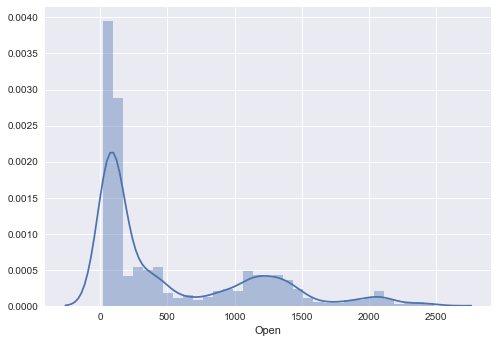

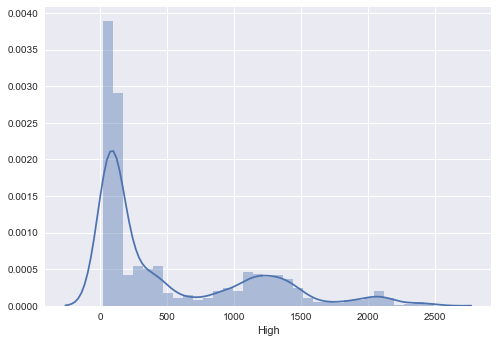

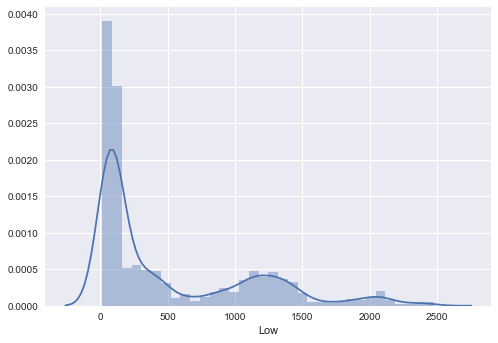

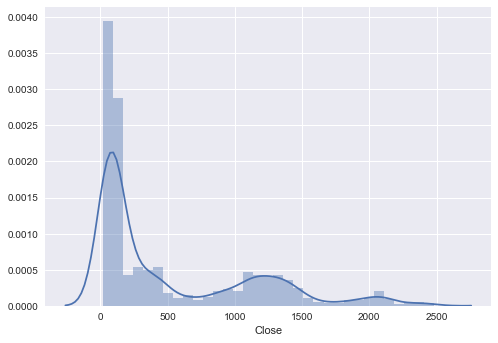

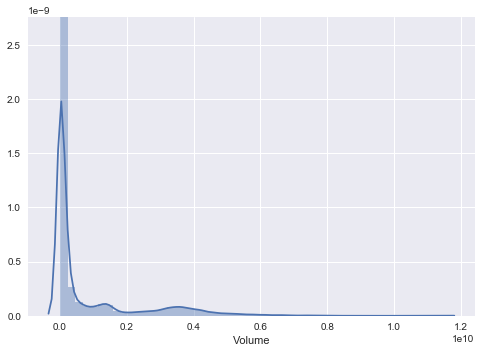

In [9]:
plot_distributions(df.drop('Date', axis=1))

In [10]:
# time-series is not stationary, so doesn't really make sense to do distribution analysis...

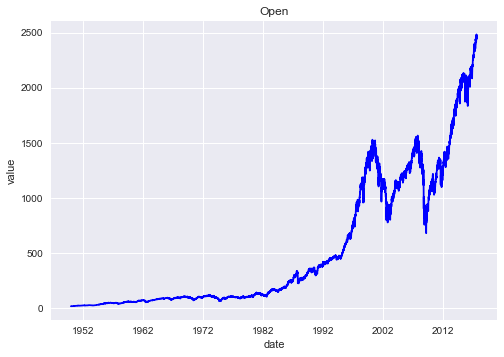

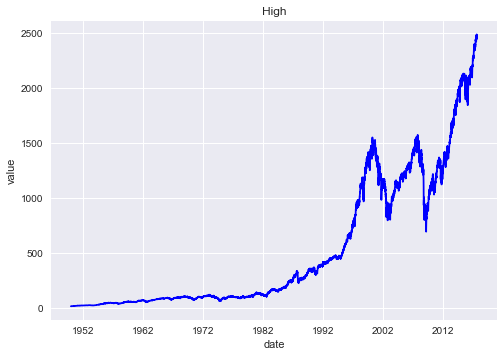

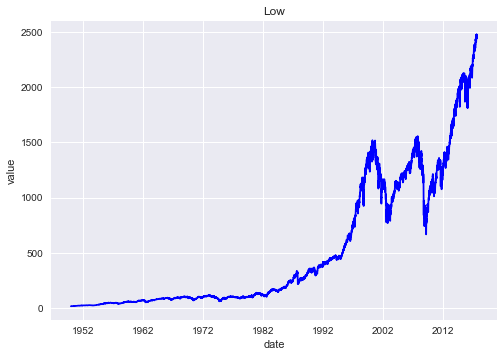

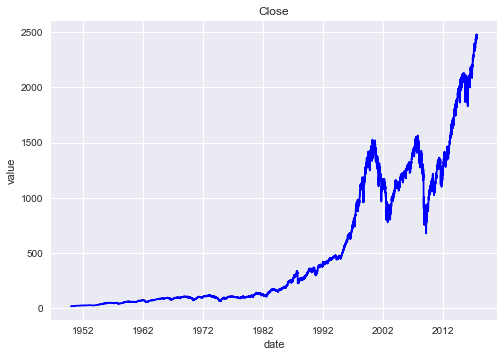

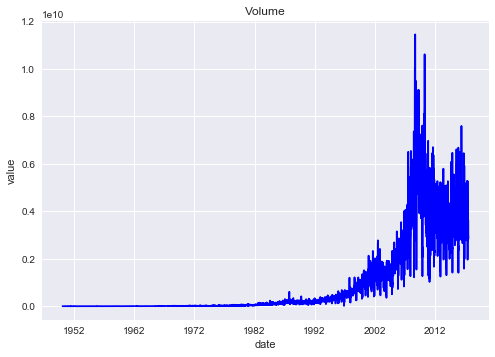

In [12]:
list_of_dates = []
for value in df['Date']:
    list_of_dates.append(datetime.datetime.strptime(value, "%Y-%m-%d"))
dates = matplotlib.dates.date2num(list_of_dates)
for column in df.drop('Date', axis=1).columns:
    plt.figure(str(column))
    plt.title(str(column))
    plt.xlabel('date')
    plt.ylabel('value')
    plt.plot_date(dates, df[column], 'b-')
    plt.show()